# Tutorial: Machine Learning with Text in scikit-learn

# Note from Donny

This combines: Kevin Markham's Text Learning Tutorial<br>
Some Information from Wikipedia<br>
And some stuff on TF-IDF

## Agenda

1. Model building in scikit-learn (refresher)
2. Representing text as numerical data
3. Reading a text-based dataset into pandas
4. Vectorizing our dataset
5. Building and evaluating a model
6. Comparing models
7. Performing Cross-Validation to select C
8. Tuning the vectorizer (discussion)
9. TF-IDF Vectorizer plus model

## Part 1: Model building in scikit-learn (refresher)

In [1]:
# load the iris dataset as an example
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
# store the feature matrix (X) and response vector (y)
X = iris.data
y = iris.target

**"Features"** are also known as predictors, inputs, or attributes. The **"response"** is also known as the target, label, or output.

In [3]:
# check the shapes of X and y
print(X.shape)
print(y.shape)

(150, 4)
(150,)


**"Observations"** are also known as samples, instances, or records.

In [4]:
# examine the first 5 rows of the feature matrix (including the feature names)
import pandas as pd
pd.DataFrame(X, columns=iris.feature_names).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
# examine the response vector
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In order to **build a model**, the features must be **numeric**, and every observation must have the **same features in the same order**.

In [6]:
# import the class
from sklearn.neighbors import KNeighborsClassifier

# instantiate the model (with the default parameters)
knn = KNeighborsClassifier()

# fit the model with data (occurs in-place)
knn.fit(X, y)

KNeighborsClassifier()

In order to **make a prediction**, the new observation must have the **same features as the training observations**, both in number and meaning.

In [7]:
# predict the response for a new observation
knn.predict([[3, 5, 4, 2]])

array([1])

## Part 2: Representing text as numerical data

In [8]:
# example text for model training (SMS messages)
simple_train = ['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

From the [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction):

> Text Analysis is a major application field for machine learning algorithms. However the raw data, a sequence of symbols cannot be fed directly to the algorithms themselves as most of them expect **numerical feature vectors with a fixed size** rather than the **raw text documents with variable length**.

We will use [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) to "convert text into a matrix of token counts":

In [9]:
# import and instantiate CountVectorizer (with the default parameters)
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

In [10]:
# learn the 'vocabulary' of the training data (occurs in-place)
vect.fit(simple_train)

CountVectorizer()

In [11]:
simple_train

['call you tonight', 'Call me a cab', 'please call me... PLEASE!']

In [23]:
# examine the fitted vocabulary
vect.get_feature_names_out()

array(['cab', 'call', 'me', 'please', 'tonight', 'you'], dtype=object)

In [24]:
# transform training data into a 'document-term matrix'
simple_train_dtm = vect.transform(simple_train)
simple_train_dtm

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 9 stored elements and shape (3, 6)>

In [14]:
simple_train_dtm

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 9 stored elements and shape (3, 6)>

In [15]:
# convert sparse matrix to a dense matrix
simple_train_dtm.toarray()

array([[0, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 0],
       [0, 1, 1, 2, 0, 0]])

In [16]:
# examine the vocabulary and document-term matrix together
pd.DataFrame(simple_train_dtm.toarray(), columns=vect.get_feature_names_out())

,cab,call,me,please,tonight,you
0,0,1,0,0,1,1
1,1,1,1,0,0,0
2,0,1,1,2,0,0


From the [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction):

> In this scheme, features and samples are defined as follows:

> - Each individual token occurrence frequency (normalized or not) is treated as a **feature**.
> - The vector of all the token frequencies for a given document is considered a multivariate **sample**.

> A **corpus of documents** can thus be represented by a matrix with **one row per document** and **one column per token** (e.g. word) occurring in the corpus.

> We call **vectorization** the general process of turning a collection of text documents into numerical feature vectors. This specific strategy (tokenization, counting and normalization) is called the **Bag of Words** or "Bag of n-grams" representation. Documents are described by word occurrences while completely ignoring the relative position information of the words in the document.

In [17]:
# check the type of the document-term matrix
type(simple_train_dtm)

scipy.sparse._csr.csr_matrix

In [18]:
# examine the sparse matrix contents
print(simple_train_dtm)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 9 stored elements and shape (3, 6)>
  Coords	Values
  (0, 1)	1
  (0, 4)	1
  (0, 5)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	2


From the [scikit-learn documentation](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction):

> As most documents will typically use a very small subset of the words used in the corpus, the resulting matrix will have **many feature values that are zeros** (typically more than 99% of them).

> For instance, a collection of 10,000 short text documents (such as emails) will use a vocabulary with a size in the order of 100,000 unique words in total while each document will use 100 to 1000 unique words individually.

> In order to be able to **store such a matrix in memory** but also to **speed up operations**, implementations will typically use a **sparse representation** such as the implementations available in the `scipy.sparse` package.

In [19]:
# example text for model testing
simple_test = ["please don't call me"]

In order to **make a prediction**, the new observation must have the **same features as the training observations**, both in number and meaning.

In [20]:
# transform testing data into a document-term matrix (using existing vocabulary)
simple_test_dtm = vect.transform(simple_test)
simple_test_dtm.toarray()

array([[0, 1, 1, 1, 0, 0]])

In [21]:
# examine the vocabulary and document-term matrix together
pd.DataFrame(simple_test_dtm.toarray(), columns=vect.get_feature_names_out())

,cab,call,me,please,tonight,you
0,0,1,1,1,0,0


**Summary:**

- `vect.fit(train)` **learns the vocabulary** of the training data
- `vect.transform(train)` uses the **fitted vocabulary** to build a document-term matrix from the training data
- `vect.transform(valid)` uses the **fitted vocabulary** to build a document-term matrix from the validation data (and **ignores tokens** it hasn't seen before)

## Part 3: Reading a text-based dataset into pandas

Now you are going to do some things.

In [26]:
# read file into pandas using a relative path sms.tsv
# your code here
path = 'sms.tsv'
sms = pd.read_table(path, header=None, names=['label', 'message'])


Check the .head() as usual, did read_table work correctly? Do you need to set any parameters such as header or names?

We want the columns to have names <i>label</i> and <i>message</i>

In [28]:
# your code here, read the tsv correctly
print(sms)

     label                                            message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham               Will ü b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [ ]:
# examine the shape
sms.shape

Examine the first 10 rows

In [29]:
# examine the first 10 rows
sms.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [30]:
# examine the class distribution
sms.label.value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [31]:
# convert label to a numerical variable
sms['label_num'] = sms.label.map({'ham':0, 'spam':1})

In [32]:
# check that the conversion worked
sms.head(10)

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
6,ham,Even my brother is not like to speak with me. ...,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1


In [35]:
# Identify what will be the response variable and what will be the set of features, the X and y
X = sms.message
y = sms.label
print(X.shape)
print(y.shape)

(5572,)
(5572,)


In [39]:
# split X and y into training and validation sets - train_test_split with random_state=1138 so we all get the same
# your code here
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1138)

print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(4457,)
(1115,)
(4457,)
(1115,)


## Part 4: Vectorizing our dataset

In [40]:
# instantiate the vectorizer
vect = CountVectorizer()

### Notice

The Vectorizer (the vocabulary) is only built on the Training Set of Data. Can anyone tell me why?

The Vectorizer needs to be "fit" like a ML algorithm. Fit the <i>vect</i> with X_train

In [41]:
# your code here
vect.fit(X_train)


CountVectorizer()

You now need to create a dtm (document term matrix) like above by transforming the text into a matrix

In [42]:
# your code here
X_train_dtm = vect.transform(X_train)

In [43]:
# examine the document-term matrix
print(X_train_dtm)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 59721 stored elements and shape (4457, 7783)>
  Coords	Values
  (0, 5447)	1
  (0, 6992)	1
  (0, 7727)	1
  (1, 874)	1
  (1, 1113)	2
  (1, 2869)	1
  (1, 3380)	1
  (1, 3432)	2
  (1, 3462)	1
  (1, 4242)	1
  (1, 4439)	1
  (1, 4702)	1
  (1, 4975)	1
  (1, 6571)	1
  (1, 6648)	1
  (1, 6792)	1
  (1, 6896)	1
  (1, 7730)	1
  (2, 777)	1
  (2, 1138)	1
  (2, 1207)	1
  (2, 1292)	1
  (2, 1308)	1
  (2, 1594)	1
  (2, 1625)	1
  :	:
  (4455, 4798)	1
  (4455, 4975)	1
  (4455, 5289)	1
  (4455, 5961)	1
  (4456, 986)	1
  (4456, 1026)	1
  (4456, 1048)	1
  (4456, 1066)	2
  (4456, 1076)	1
  (4456, 1594)	1
  (4456, 1667)	1
  (4456, 2151)	1
  (4456, 3035)	1
  (4456, 3183)	1
  (4456, 3383)	1
  (4456, 4047)	1
  (4456, 4382)	1
  (4456, 4948)	1
  (4456, 5636)	1
  (4456, 6045)	1
  (4456, 6849)	1
  (4456, 6853)	2
  (4456, 6885)	1
  (4456, 7134)	1
  (4456, 7537)	1


In [44]:
import numpy as np

In [45]:
for row in X_train_dtm.toarray():
     print(row)

[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 1 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 1 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ... 0 0 0]
[0 0 0 ...

In [46]:
X_train_dtm.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(4457, 7783))

The test data is transformed to the already fitted vocabulary. Words that were not in the original training set are ignored (our model would not know what to do with them). 

We could, of course, built this all as a pipeline using make_pipeline

In [47]:
# transform testing data (using fitted vocabulary) into a document-term matrix
# your code, make the X_test_dtm, you have already fit vect, so just transform
X_test_dtm = vect.transform(X_valid)
X_test_dtm

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 13465 stored elements and shape (1115, 7783)>

## Part 5: Building and evaluating a model

We will use LogisticRegression to start with the default settings:

In [ ]:
# import and instantiate a LogisticRegression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
nb = logreg.fit(X_train_dtm, y_train)

Note: X_train_dtm is a sparse matrix, LogisticRegression understands sparse matrices, some models may have to do conversions.

In [57]:
# train the model using X_train_dtm (timing it with an IPython "magic command")
# Fill in below
%time nb.fit(X_train_dtm, y_train)

CPU times: user 21.5 ms, sys: 4.2 ms, total: 25.7 ms
Wall time: 25.3 ms


LogisticRegression()

In [59]:
# make class predictions for X_test_dtm
# Fill in below
y_pred_class = nb.predict(X_test_dtm)

In [60]:
# calculate accuracy of class predictions
from sklearn import metrics
metrics.accuracy_score(y_valid, y_pred_class)

0.9883408071748879

In [62]:
nb.score(X_test_dtm, y_valid)

0.9883408071748879

In [64]:
# print the confusion matrix
metrics.confusion_matrix(y_valid, y_pred_class)

array([[980,   2],
       [ 11, 122]])

In [65]:
# print the classification report (import it if you have not already)
print(metrics.classification_report(y_valid, y_pred_class))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       982
        spam       0.98      0.92      0.95       133

    accuracy                           0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [67]:
# print out all the "wrong" ones
X_valid[y_pred_class != y_valid]

1777                    Call FREEPHONE 0800 542 0578 now!
2965    Do you ever notice that when you're driving, a...
4144    In The Simpsons Movie released in July 2007 na...
19      England v Macedonia - dont miss the goals/team...
763     Urgent Ur £500 guaranteed award is still uncla...
2247    Hi ya babe x u 4goten bout me?' scammers getti...
2402    Babe: U want me dont u baby! Im nasty and have...
1449    As a registered optin subscriber ur draw 4 £10...
3460    Not heard from U4 a while. Call me now am here...
495                      Are you free now?can i call now?
2774    How come it takes so little time for a child w...
4729    I (Career Tel) have added u as a contact on IN...
1430    For sale - arsenal dartboard. Good condition b...
Name: message, dtype: object

In [ ]:
# print message text for the false positives (ham incorrectly classified as spam)
X_valid[(y_pred_class==1) & (y_valid==0)] # or X_valid[y_pred_class > y_valid]

Series([], Name: message, dtype: object)

In [88]:
# print message text for the false negatives (spam incorrectly classified as ham)
X_valid[(y_pred_class==0) & (y_valid==1)]

Series([], Name: message, dtype: object)

In [87]:
# example false negative
X_valid[3132]

KeyError: 3132

In [80]:
# calculate predicted probabilities for X_test_dtm (poorly calibrated probabilities)
y_pred_prob = nb.predict_proba(X_test_dtm)[:, 1]
y_pred_prob

array([1.28128997e-03, 6.69488604e-03, 9.94986717e-01, ...,
       9.53558501e-03, 8.39936512e-03, 6.62945106e-04], shape=(1115,))

In [93]:
# calculate AUC - another metric for measure the performance of a classification system, it relies on probabilities. 
# I briefly mentioned it in lectures
metrics.roc_auc_score(y_valid, y_pred_prob)

np.float64(0.9779106626035556)

## Part 6: Comparing models

We will compare LogisticRegression with a linear Support Vector Classifier and Random Forests:

Probability=True makes it take a bit longer to train but it will allow us to calculate the roc_auc score

In [102]:
# import and instantiate a SVC model
from sklearn.svm import SVC
svcmodel = SVC(kernel='linear', probability=True)


In [103]:
# train the model using X_train_dtm
%time svcmodel.fit(X_train_dtm, y_train)

CPU times: user 1.99 s, sys: 9.75 ms, total: 2 s
Wall time: 2.04 s


SVC(kernel='linear', probability=True)

In [104]:
# make class predictions for X_test_dtm
y_pred_class = svcmodel.predict(X_test_dtm)

In [105]:
# calculate predicted probabilities for X_test_dtm (well calibrated)
y_pred_prob = svcmodel.predict_proba(X_test_dtm)[:, 1]

In [108]:
# calculate accuracy
metrics.accuracy_score(y_valid, y_pred_class)

0.9874439461883409

In [110]:
# calculate AUC
metrics.roc_auc_score(y_valid, y_pred_prob)

np.float64(0.9817695971088618)

Now do Random Forests

CPU times: user 1.13 s, sys: 0 ns, total: 1.13 s
Wall time: 1.19 s
Random Forest accuracy: 0.9848
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       982
           1       1.00      0.87      0.93       133

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.99      0.98      0.98      1115



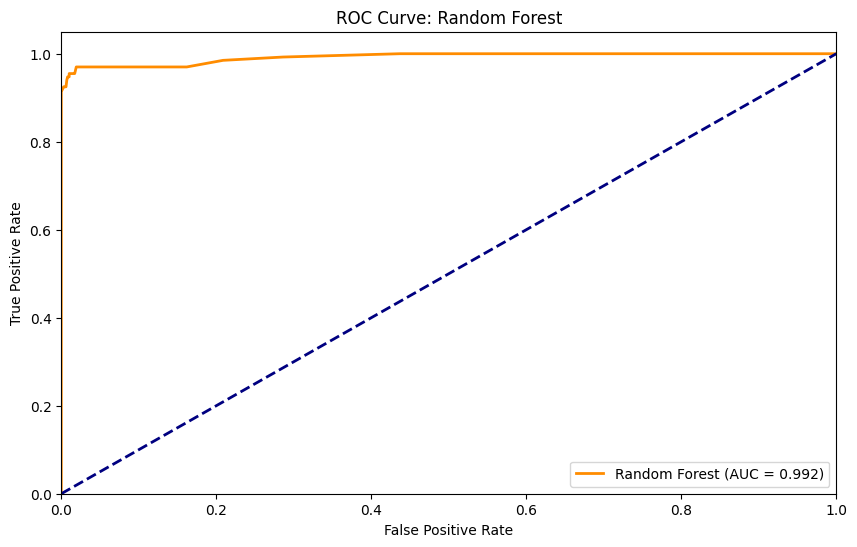

In [112]:
# Import and instantiate a Random Forest model
from sklearn.ensemble import RandomForestClassifier

# Create the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=1138)

# Train the model using X_train_dtm (timing it with an IPython "magic command")
%time rf_model.fit(X_train_dtm, y_train)

# Make predictions on validation data
y_pred_rf = rf_model.predict(X_valid_dtm)

# Convert y_valid to numerical values
y_valid_num = y_valid.map({'ham': 0, 'spam': 1})

# Convert y_pred_rf to numerical values
y_pred_rf_num = pd.Series(y_pred_rf).map({'ham': 0, 'spam': 1})

# Calculate accuracy
from sklearn.metrics import accuracy_score
print(f"Random Forest accuracy: {accuracy_score(y_valid_num, y_pred_rf_num):.4f}")

# Print classification report
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_valid_num, y_pred_rf_num))

# Calculate predicted probabilities for ROC curve
y_pred_prob_rf = rf_model.predict_proba(X_valid_dtm)[:, 1]

# Plot ROC curve
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_valid_num, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Random Forest')
plt.legend(loc="lower right")
plt.show()

## Part 7: Cross Validation

Now you want to do some form of cross-validation with SVC, find the best 'C', use GridSearchCV or whatever method was your favourite. Find the best cross-validation score. You can set probability=False this time around and just use the accuracy score to compare

Same with Random Forest

In [ ]:
# your code here

Now find the best 'C' with LogisticRegression using cross-validation, again find the best cross-validation score.

In [ ]:
# your code here

## Part 8: Tuning the vectorizer (discussion)

All of this can go into maybe a pipeline, keep the Vectorizer options as hyperparameters that could be chosen using cross-validation

Thus far, we have been using the default parameters of [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html):

In [ ]:
# show default parameters for CountVectorizer
vect

However, the vectorizer is worth tuning, just like a model is worth tuning! Here are a few parameters that you might want to tune:

- **stop_words:** string {'english'}, list, or None (default)
    - If 'english', a built-in stop word list for English is used.
    - If a list, that list is assumed to contain stop words, all of which will be removed from the resulting tokens.
    - If None, no stop words will be used.

In [ ]:
# remove English stop words
vect = CountVectorizer(stop_words='english')

In [ ]:
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm

- **ngram_range:** tuple (min_n, max_n), default=(1, 1)
    - The lower and upper boundary of the range of n-values for different n-grams to be extracted.
    - All values of n such that min_n <= n <= max_n will be used.

In [ ]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))

In [ ]:
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm

- **max_df:** float in range [0.0, 1.0] or int, default=1.0
    - When building the vocabulary, ignore terms that have a document frequency strictly higher than the given threshold (corpus-specific stop words).
    - If float, the parameter represents a proportion of documents.
    - If integer, the parameter represents an absolute count.

In [ ]:
# ignore terms that appear in more than 50% of the documents
vect = CountVectorizer(max_df=0.5)

In [ ]:
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm

- **min_df:** float in range [0.0, 1.0] or int, default=1
    - When building the vocabulary, ignore terms that have a document frequency strictly lower than the given threshold. (This value is also called "cut-off" in the literature.)
    - If float, the parameter represents a proportion of documents.
    - If integer, the parameter represents an absolute count.

In [ ]:
# only keep terms that appear in at least 2 documents
vect = CountVectorizer(min_df=2)

In [ ]:
X_train_dtm = vect.fit_transform(X_train)
X_train_dtm

**Guidelines for tuning CountVectorizer:**

- Use your knowledge of the **problem** and the **text**, and your understanding of the **tuning parameters**, to help you decide what parameters to tune and how to tune them.
- **Experiment**, and let the data tell you the best approach!
- We could use cross-validation to make our choices! 

We can also use a pipeline like

make_pipeline(CountVectorizer(), LogisticRegression())

we can do cross-validation over the CountVectorizer parameters then

# TF-IDF

The most commonly used technique is the tf-idf short for “term frequency-inverse document frequency”, which basically reflects how important a word is to a document (email) in a collection or corpus (our set of emails or documents).

## Term frequency

Suppose we have a set of English text documents and wish to rank which document is most relevant to the query, "the brown cow". A simple way to start out is by eliminating documents that do not contain all three words "the", "brown", and "cow", but this still leaves many documents. To further distinguish them, we might count the number of times each term occurs in each document; the number of times a term occurs in a document is called its term frequency. However, in the case where the length of documents varies greatly, adjustments are often made (see definition below). The first form of term weighting is due to Hans Peter Luhn (1957) which may be summarized as:

    The weight of a term that occurs in a document is simply proportional to the term frequency.

## Inverse document frequency
Because the term "the" is so common, term frequency will tend to incorrectly emphasize documents which happen to use the word "the" more frequently, without giving enough weight to the more meaningful terms "brown" and "cow". The term "the" is not a good keyword to distinguish relevant and non-relevant documents and terms, unlike the less-common words "brown" and "cow". Hence an inverse document frequency factor is incorporated which diminishes the weight of terms that occur very frequently in the document set and increases the weight of terms that occur rarely. 


## TF-IDF

The tf-idf is an statistic that increases with the number of times a word appears in the document, penalized by the number of documents in the corpus that contain the word.

Fortunately for us, Scikit-learn has a method that does just this (sklearn.feature_extraction.text.TfidfVectorizer). See the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#TfidfVectorizer?

In [ ]:
tfidf_vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.5, stop_words='english')

## Why these options?

TfidfVectorizer sets the vectorizer up. Here we change sublinear_tf to true, which replaces tf with 1 + log(tf). This addresses the issue that “twenty occurrences of a term in a document” does not represent “twenty times the significance of a single occurrence” [link](https://nlp.stanford.edu/IR-book/html/htmledition/sublinear-tf-scaling-1.html). Therefore, it reduces the importance of high frequency words (note that 1+log(1) = 1, while 1+log(20) = 2.3).

In [ ]:
corpus = [
    "This is my first email.",
    "I'm trying to learn machine learning.",
    "This is the second email",
    "Learning is fun"
]

In [ ]:
corpus_M = tfidf_vectorizer.fit_transform(corpus)

In [ ]:
print(corpus_M)

In [ ]:
vocabulary = tfidf_vectorizer.get_feature_names()

In [ ]:
print(vocabulary)

In [ ]:
pd.DataFrame(data=corpus_M.toarray(), columns=vocabulary)

In [ ]:
test = ["I’m also trying to learn python"]

In [ ]:
corpus_test = tfidf_vectorizer.transform(test)
pd.DataFrame(data=corpus_test.toarray(), columns=vocabulary)

## SMS Set

Use the SMS set to make a classifier using tfidf as our vectorizer instead of the bag of words

In [ ]:
#your code here
X_train_dtm = tfidf_vectorizer

In [ ]:
X_train_dtm

In [ ]:
X_train_dtm.toarray()

In [ ]:
.fit()

In [ ]:
X_valid_dtm = tfidf_vectorizer.transform()

In [ ]:
X_valid_dtm

In [ ]:
y_pred_class = .predict()

In [ ]:
metrics.accuracy_score()

In [ ]:
.score()

Take whatever was the best above (LogisticRegression, SVC, Random Forest) and see how it would compare with a TFIDF vectorizer